In [1]:
import MySQLdb
from star_match import star_match
import numpy as np
import astropy.stats as st
from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
conn = MySQLdb.connect("localhost", "uvbys", "uvbySurvey", "survey")
cur = conn.cursor()

In [3]:
sql = "select * from FileOverlap limit 10"
cur.execute(sql)

10L

In [4]:
tb = cur.fetchall()

In [8]:
f1 = tb[5][1]
f2 = tb[5][2]

In [9]:
f1,f2

('7198N0010', '7246N0039')

In [11]:
sql = "select starsn, radeg, decdeg from Stars where fileid = '%s'" % f1
cur.execute(sql)
tb1 = cur.fetchall()

In [12]:
sql = "select starsn, radeg, decdeg from Stars where fileid = '%s'" % f2
cur.execute(sql)
tb2 = cur.fetchall()

In [13]:
len(tb1),len(tb2)

(5356, 2626)

In [21]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
list_a, list_b = tb1, tb2
a_ra, a_dec, b_ra, b_dec = 1,2,1,2

In [20]:
list_a, list_b = tbSDSS, tbStar
a_ra, a_dec, b_ra, b_dec,a_mag, b_mag = 1,2,1,2,3,3

In [21]:
    len_a = len(list_a)
    len_b = len(list_b)
    (len_a, len_b)

(58754, 2500)

In [22]:
    ra_a = np.array([k[a_ra] for k in list_a])
    dec_a = np.array([k[a_dec] for k in list_a])
    ra_b = np.array([k[b_ra] for k in list_b])
    dec_b = np.array([k[b_dec] for k in list_b])

In [23]:
    ra_scale = np.cos(np.median(dec_a) / 180.0 * np.pi)

(array([ 186.,  222.,  270.,  355.,  370.,  235.,  234.,  207.,  208.,  213.]),
 array([ 11.400487 ,  11.5036343,  11.6067816,  11.7099289,  11.8130762,
         11.9162235,  12.0193708,  12.1225181,  12.2256654,  12.3288127,
         12.43196  ]),
 <a list of 10 Patch objects>)

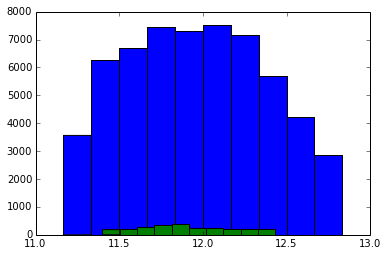

In [46]:
plt.hist(dec_a)
plt.hist(dec_b)

In [24]:
    ix_a = np.argsort(dec_a)
    ix_b = np.argsort(dec_b)

In [39]:
dis_limit = 0.001
dis_limit * 3600

3.6

In [40]:
    out_a , out_b = [] , []
    dis_ab, ra_ab, dec_ab = [], [], []
    pbf = pbt = 0  # point b from/to
    for pa in range(len_a) :
        ix_pa = ix_a[pa]
        ra_p, dec_p = ra_a[ix_pa], dec_a[ix_pa]
        # pb walk down to first position [pbf]>=[pa]-dis, [pbt]>=[pa]+dis
        while pbf < len_b and dec_b[ix_b[pbf]] < dec_p - dis_limit : pbf += 1
        while pbt < len_b and dec_b[ix_b[pbt]] < dec_p + dis_limit : pbt += 1
        # exit if p2f runout
        if pbf >= len_b : break
        # skip if no near star
        if pbt - pbf < 1 : continue
        # check real distance, include ra
        for ix_pb in ix_b[range(pbf, pbt)] :
            d_ra = ra_p - ra_b[ix_pb]
            d_dec = dec_p - dec_b[ix_pb]
            dis = np.sqrt((d_ra * ra_scale) ** 2 + d_dec ** 2)
            if dis < dis_limit :
                out_a.append(ix_pa)
                out_b.append(ix_pb)
                dis_ab.append(dis * 3600.0)
                ra_ab.append(d_ra * 3600.0)
                dec_ab.append(d_dec * 3600.0)


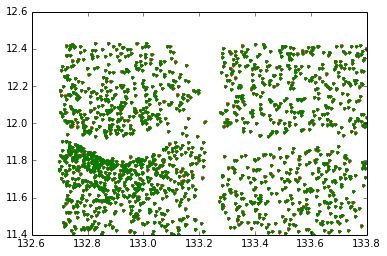

In [41]:
plt.plot(ra_a[out_a], dec_a[out_a], 'r.')
plt.plot(ra_b[out_b], dec_b[out_b], 'g.')

(array([  2.,   8.,   9.,  10.,  34.,  16.,  36.,  41.,  34.,  30.,  37.,
         30.,  31.,  33.,  44.,  40.,  46.,  54.,  36.,  42.,  83.,  72.,
         71.,  70.,  51.,  55.,  44.,  52.,  52.,  36.,  50.,  41.,  33.,
         37.,  31.,  30.,  32.,  27.,  46.,  38.,  38.,  35.,  34.,  18.,
         15.,  14.,  14.,   9.,   9.,   3.]),
 array([-3.56553799, -3.42315632, -3.28077466, -3.13839299, -2.99601132,
        -2.85362966, -2.71124799, -2.56886632, -2.42648465, -2.28410299,
        -2.14172132, -1.99933965, -1.85695799, -1.71457632, -1.57219465,
        -1.42981298, -1.28743132, -1.14504965, -1.00266798, -0.86028632,
        -0.71790465, -0.57552298, -0.43314131, -0.29075965, -0.14837798,
        -0.00599631,  0.13638535,  0.27876702,  0.42114869,  0.56353036,
         0.70591202,  0.84829369,  0.99067536,  1.13305702,  1.27543869,
         1.41782036,  1.56020203,  1.70258369,  1.84496536,  1.98734703,
         2.12972869,  2.27211036,  2.41449203,  2.5568737 ,  2.69925536,
 

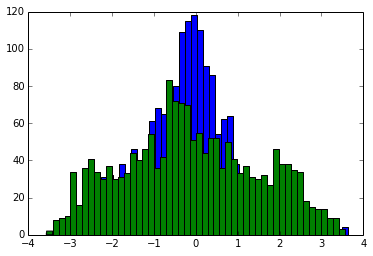

In [42]:
plt.hist(ra_ab, bins=50)
plt.hist(dec_ab, bins=50)

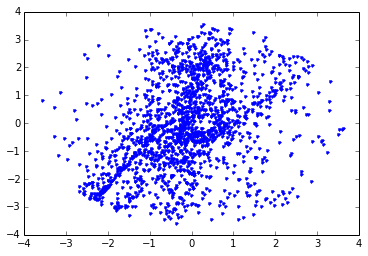

In [43]:
plt.plot(ra_ab, dec_ab, '.')

In [44]:
mag_a = np.array([k[a_mag] for k in list_a])
mag_b = np.array([k[b_mag] for k in list_b])
len(mag_a), len(mag_b)

(58754, 2500)

(1753, 2.7368705476326296, 4.4866353113236075)

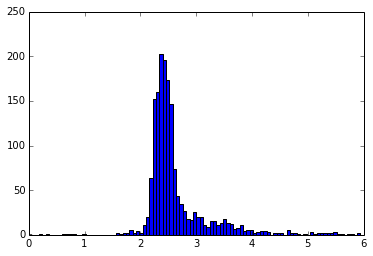

In [58]:
mag_diff = mag_a[out_a] - mag_b[out_b]
std = mag_diff.std()
mea = mag_diff.mean()
plt.hist(mag_diff, bins=100, range=(0,6))
len(mag_diff), mea, std

In [63]:
import scipy.stats as ss

(1621, 0.479804254023455, 2.5849183837137568, 0.18589711359648176, 4.9839396538310314)
(1343, 0.16671294856402155, 2.4295673119880838, 1.9294284662960193, 2.9297061576801484)


(1.9294284662960193, 2.9297061576801484)

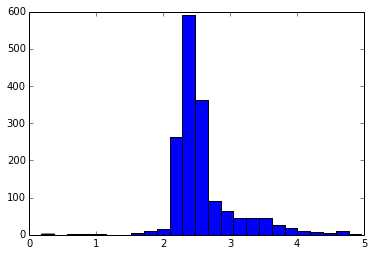

In [77]:
#md,ma=st.funcs.sigma_clip(mag_diff, 2, 5)
#md.std()
md,ml,mh = ss.sigmaclip(mag_diff,5,5)
plt.hist(md, bins=25)
print (len(md),md.std(),md.mean(),ml,mh)
md2,ml2,mh2 = ss.sigmaclip(mag_diff, 3, 3)
print(len(md2),md2.std(),md2.mean(),ml2,mh2)
md2.mean()-3*md2.std(),md2.mean()+3*md2.std()

In [46]:
mag_limit = -3
mag_limit_x = - std * mag_limit if mag_limit < 0 else mag_limit
mag_limit_x

13.459905933970823

In [47]:
ix_m = np.where(np.abs(mag_diff-mag_diff.mean()) < mag_limit_x)
print (len(mag_diff), max(out_a), max(out_b), len(ix_m), len(ix_m[0]), ix_m[0][100])

(1753, 57292, 2493, 1, 1749, 100)


In [98]:
ix_m, min(ix_m[0]), max(ix_m[0]), ix_m[0][200], out_b[ix_m[0][200]]

((array([   0,    1,    2, ..., 2565, 2566, 2567]),), 0, 2567, 200, 877)

In [48]:
out_ax = [out_a[i] for i in ix_m[0]]
out_bx = [out_b[i] for i in ix_m[0]]

In [49]:
out_ax = []
for i in ix_m[0]:
    print (i, out_a[i])
    out_ax.append(out_a[i])
    if len(out_ax) > 10 : break;

(0, 37068)
(1, 34489)
(2, 32873)
(3, 17885)
(4, 33856)
(5, 33846)
(6, 16806)
(7, 36079)
(8, 37091)
(9, 17329)
(10, 35883)


In [13]:
cur.close()
conn.close()

# test match Stars with M67

In [107]:
from star_match import star_match

In [3]:
    sql_sdss = "select ObjID, RAdeg, Decdeg, magu from SDSSnearM67"
    cur.execute(sql_sdss)
    tb_sdss = cur.fetchall()
    print ("%d Stars from SDSS" % (cur.rowcount))

58754 Stars from SDSS


In [5]:
sdss_ra = np.array([row[1] for row in tb_sdss])
sdss_dec = np.array([row[2] for row in tb_sdss])
sdss_u = [row[3] for row in tb_sdss]

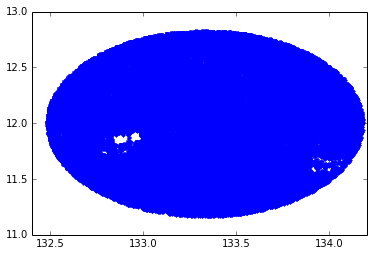

In [25]:
plt.plot(sdss_ra, sdss_dec, '.')

In [26]:
min(sdss_ra), max(sdss_ra), min(sdss_dec), max(sdss_dec)

(132.478281799328, 134.181815143794, 11.1670672854582, 12.8328645025338)

In [6]:
    sql_m67 = "select fileid, filtercode, exptime, (select count(*) from Stars where fileid=m67.fileid) as cnt from m67"
    cur.execute(sql_m67)
    tb_m67 = cur.fetchall()

In [7]:
    file_id = [row[0] for row in tb_m67 if row[3] > 0]
    filter_code = [row[1] for row in tb_m67 if row[3] > 0]
    exp_time = [row[2] for row in tb_m67 if row[3] > 0]
    star_cnt = [row[3] for row in tb_m67 if row[3] > 0]

In [8]:
    sql_ins0 = "insert into m67_match(my_star_code, sdss_obj_id, distance) values('%s', '%s', %f)"

In [9]:
    for f in file_id :
        sql_my = "select StarCode, RADeg, DecDeg, MagAuto, MagCorr, MagAutoErr from Stars where FileID = '%s'" % f
        n_my = cur.execute(sql_my)
        tb_my = cur.fetchall()
        #my_ra = [row[1] for row in tb_my]
        #my_dec = [row[2] for row in tb_my]
        #plt.plot(my_ra, my_dec, '.')
        ix_sdss, ix_my, dis_sdss_my = star_match(tb_sdss, tb_my, 1, 2, 1, 2, 3, 3)
        n_match = len(ix_sdss)
        #print (len(ix_my))
        #plt.plot(sdss_ra[ix_sdss], sdss_dec[ix_sdss], '.')
        for i in range(n_match) :
            sql = sql_ins0 % (tb_my[ix_my[i]][0], tb_sdss[ix_sdss[i]][0], dis_sdss_my[i])
            cur.execute(sql)
        conn.commit()
        print ("File %s | %5d stars | %5d matched" % (f, n_my, n_match))


File 7360B0386 |  1046 stars |   478 matched
File 7360B0387 |  2572 stars |  1461 matched
File 7360B0388 |  1412 stars |   783 matched
File 7360B0389 |  2581 stars |  1341 matched
File 7362B0276 |  1286 stars |   584 matched
File 7362B0277 |  1972 stars |   967 matched
File 7362B0278 |  3256 stars |  1325 matched
File 7362B0279 |  1523 stars |   698 matched
File 7362B0280 |  2252 stars |  1030 matched
File 7362B0281 |  3200 stars |  1481 matched
File 7362B0288 |  1260 stars |   592 matched
File 7362B0289 |  2041 stars |   910 matched
File 7362B0290 |  3201 stars |  1336 matched
File 7362B0291 |  1453 stars |   639 matched
File 7362B0292 |  2369 stars |  1084 matched
File 7362B0293 |  3168 stars |  1494 matched
File 7418B0075 |  2471 stars |   701 matched
File 7418B0076 |  2538 stars |   896 matched
File 7418B0077 |  2438 stars |  1012 matched
File 7418B0078 |  2376 stars |   921 matched
File 7418B0079 |  2373 stars |   848 matched
File 7418B0080 |  2628 stars |  1040 matched
File 7418B

In [11]:
cur.execute('select count(*) from m67_match')
cur.fetchall()

((98889L,),)

In [15]:
cur.execute('select * from m67ref')
tb_ref = cur.fetchall()

In [16]:
ra_ref = [row[1] for row in tb_ref]
dec_ref = [row[2] for row in tb_ref]

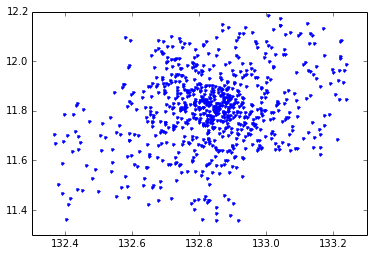

In [17]:
plt.plot(ra_ref, dec_ref, '.')

In [25]:
ix_sdss, ix_ref, dis_sdss_ref = star_match(tb_sdss, tb_ref, 1,2, 1,2)

649

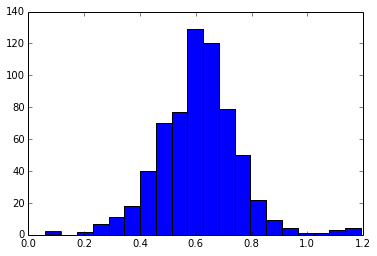

In [26]:
plt.hist(dis_sdss_ref*3600.0, bins=20)
len(ix_sdss)

In [17]:
ix_sdss, ix_my = star_match(tbSDSS, tbStar, 1, 2, 1, 2, 3, 3, mag_limit=2.0)

In [18]:
ix_my2 = sorted(ix_my)
ix_sd2 = sorted(ix_sdss)

In [50]:
cmy = csd = 0
for i in range(1,len(ix_my2)):
    if ix_my2[i-1]==ix_my2[i]:
        cmy += 1
        #print ('my', cmy, i, ix_my2[i])
    if ix_sd2[i-1]==ix_sd2[i]:
        csd += 1
        #print ('sdss', csd, i, ix_sd2[i])
cmy, csd

(87, 33)

In [86]:
uq_my = np.unique(ix_my2)
cnt_my = [(ix_my2 == u).sum() for u in uq_my]
len(uq_my)

1880

In [87]:
t = np.arange(10)

In [92]:
t[np.where(t > 5)].min()

6

In [101]:
np.delete(t, [3,4])

array([0, 1, 2, 5, 6, 7, 8, 9])

In [30]:
300 * 15000 / 3600 / 24

52